In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import utils
from scipy.optimize import curve_fit
#import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
#importlib.reload(utils)

In [2]:
# Load data
def load_scan(path):
    return (
        pd.read_csv(
            path,
            skiprows=22,              # header lines
            sep=",",                 # comma-delimited (trailing comma OK)
            skipinitialspace=True,
            names=["Mass", "Pressure (uncorrected)", "trash"],
            usecols=[0, 1],          # keep just the first two columns
            dtype=float
        )
        .set_index("Mass")           # Mass as the index → easy alignment
    )

# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = load_scan("Data/unk_18_bg.txt")          # rows = Mass values

data_dict = {}

path = 'Data/unk_18.txt'
df = load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 18'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Unknown 18"].head())

   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            3.480000e-10     2.619000e-10
1   1.1            2.630000e-09     2.453000e-09
2   1.2            1.860000e-08     1.767500e-08
3   1.3            1.500000e-07     1.339000e-07
4   1.4            5.310000e-08     4.668000e-08


In [3]:
bkg = load_scan("Data/unk_4_bg.txt")
path = 'Data/unk_4.txt'
df = load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 4'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Unknown 4"].head())

   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            6.650000e-09     6.628100e-09
1   1.1            9.950000e-09     9.789000e-09
2   1.2            2.230000e-08     2.137300e-08
3   1.3            7.810000e-08     6.790000e-08
4   1.4            3.270000e-08     2.842000e-08


In [4]:
for key, df in data_dict.items():
    df.drop(columns=['Pressure (uncorrected)'], inplace=True)
print(data_dict)

{'Unknown 18':        Mass  Pressure (torr)
0       1.0     2.619000e-10
1       1.1     2.453000e-09
2       1.2     1.767500e-08
3       1.3     1.339000e-07
4       1.4     4.668000e-08
...     ...              ...
1486  149.6     0.000000e+00
1487  149.7     0.000000e+00
1488  149.8     0.000000e+00
1489  149.9     0.000000e+00
1490  150.0     0.000000e+00

[1491 rows x 2 columns], 'Unknown 4':        Mass  Pressure (torr)
0       1.0     6.628100e-09
1       1.1     9.789000e-09
2       1.2     2.137300e-08
3       1.3     6.790000e-08
4       1.4     2.842000e-08
...     ...              ...
1486  149.6     0.000000e+00
1487  149.7     9.000000e-12
1488  149.8     1.540000e-11
1489  149.9     5.730000e-11
1490  150.0     2.180000e-11

[1491 rows x 2 columns]}


In [5]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (torr)'].max()
    if temp_max > max_value:
        max_value = temp_max

In [6]:
for key, data in data_dict.items():
    intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity

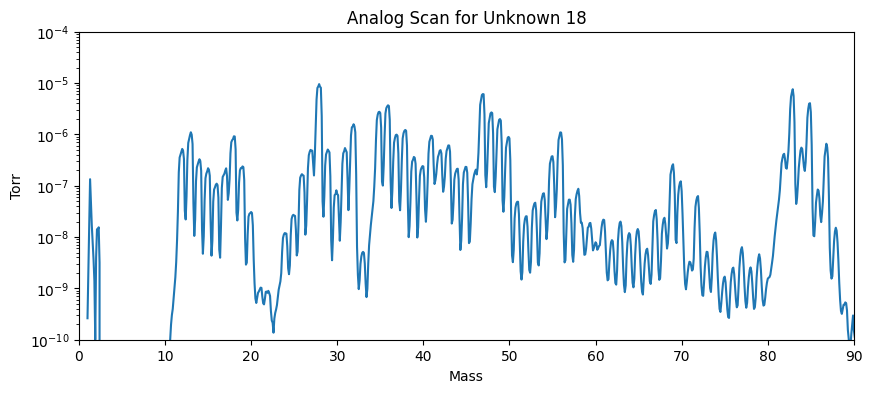

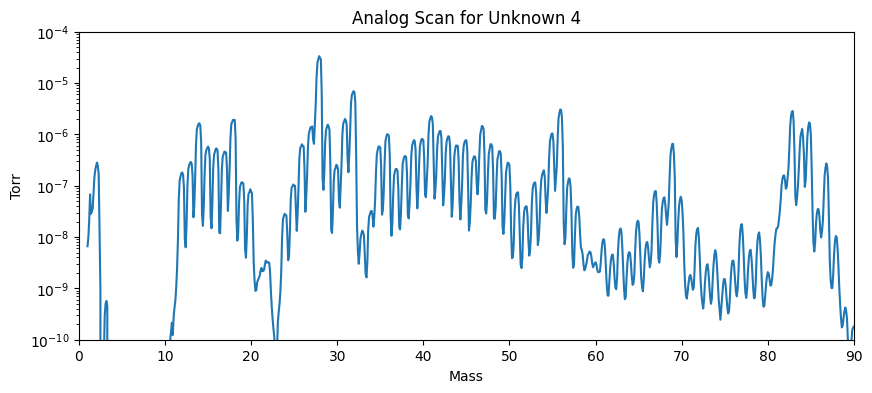

In [7]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
    ax.set_ylim(bottom=1e-10, top=1e-4)
    ax.set_xlim(0, 90)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
    plt.show()
    

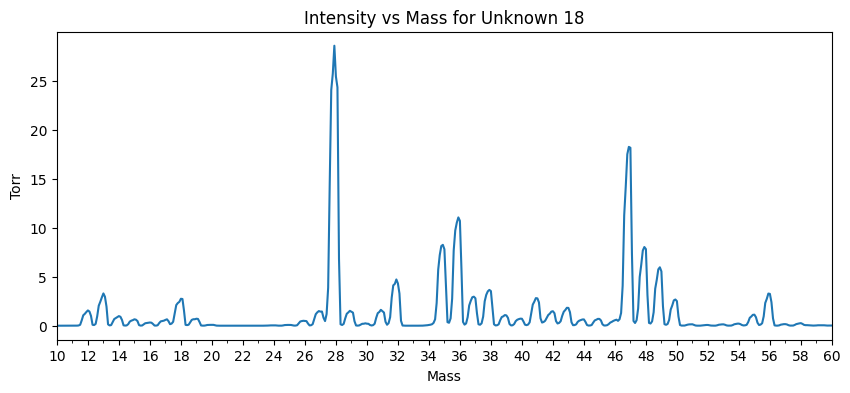

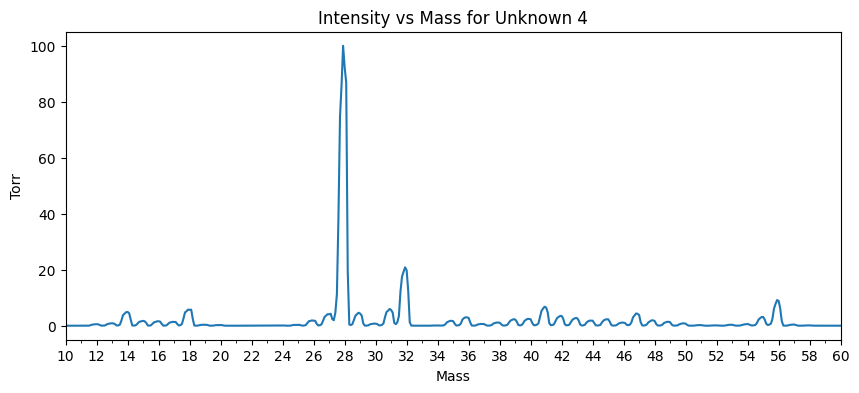

In [8]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data['Mass'], data['Intensity'])
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    #    ax.axvline(x=2,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=28,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=42,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    ax.set_xlim(10, 60)
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for {key}')
    plt.show()
    